In [1]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


id           0
title        0
content    242
target       0
dtype: int64


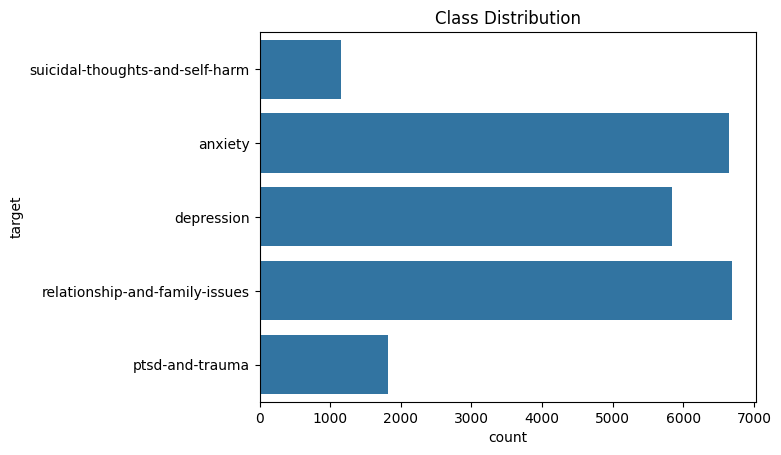

      id                                          title  \
0  11098                            Getting of the weed   
1    116  Seeking advice on how to face a hospital stay   
2   7189              Trying to re-enter the work place   
3   4350                       Family history of cancer   
4   9749     Inappropriate relationship with therapist.   

                                             content  \
0  [Post removed at request of member]\nHi, welco...   
1  Hi NMTB,\nThanks for your post. \nI think a lo...   
2  Hello, \nI’m Cas and for a fair while now I ha...   
3  Hey everyone.\nI've just discovered that anoth...   
4  Hi everyone\nI guess the title says it all rea...   

                            target  
0  suicidal-thoughts-and-self-harm  
1                          anxiety  
2                          anxiety  
3                          anxiety  
4                       depression  
count    22151.000000
mean       801.260891
std        562.511434
min          1.00000

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

# Check for missing values
print(train_df.isnull().sum())

# Check class distribution
sns.countplot(y=train_df["target"])
plt.title("Class Distribution")
plt.show()

# Inspect sample entries
print(train_df.head())

# Analyze text lengths
train_df["text_length"] = train_df["content"].apply(lambda x: len(str(x).split()))
print(train_df["text_length"].describe())

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import joblib  # For saving the model

ModuleNotFoundError: No module named 'xgboost'

In [4]:
!pip install numpy pandas scikit-learn xgboost imbalanced-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import joblib  # For saving the model

In [6]:
# Load your dataset (update the file path if necessary)
train_df = pd.read_csv("../data/raw/train.csv")  

# Check the first few rows
train_df.head()

,id,title,content,target
0,11098,Getting of the weed,"[Post removed at request of member]\nHi, welco...",suicidal-thoughts-and-self-harm
1,116,Seeking advice on how to face a hospital stay,"Hi NMTB,\nThanks for your post. \nI think a lo...",anxiety
2,7189,Trying to re-enter the work place,"Hello, \nI’m Cas and for a fair while now I ha...",anxiety
3,4350,Family history of cancer,Hey everyone.\nI've just discovered that anoth...,anxiety
4,9749,Inappropriate relationship with therapist.,Hi everyone\nI guess the title says it all rea...,depression


In [8]:
import os
import joblib  # For saving the model

# Ensure the models directory exists
models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)

# Save the vectorizer for later use
joblib.dump(vectorizer, os.path.join(models_dir, "tfidf_vectorizer.pkl"))
print("Vectorizer saved successfully!")

Vectorizer saved successfully!


In [9]:
# Apply random oversampling to balance classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [11]:
# Define an optimized XGBoost model
model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.07,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    random_state=42
)

# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [12]:
# Predict on the test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

Validation Accuracy: 0.8289

=== Classification Report ===
                                 precision    recall  f1-score   support

                        anxiety       0.84      0.77      0.80      1369
                     depression       0.72      0.71      0.72      1289
                ptsd-and-trauma       0.90      0.91      0.90      1288
 relationship-and-family-issues       0.78      0.80      0.79      1328
suicidal-thoughts-and-self-harm       0.90      0.96      0.93      1342

                       accuracy                           0.83      6616
                      macro avg       0.83      0.83      0.83      6616
                   weighted avg       0.83      0.83      0.83      6616



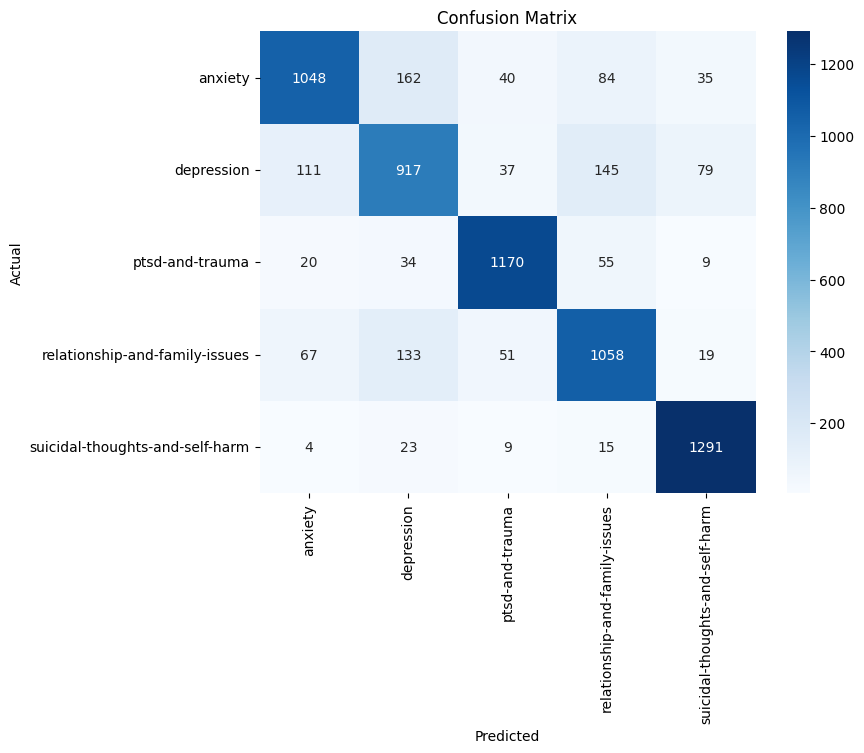

In [13]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Save trained model for future use
joblib.dump(model, "../models/xgboost_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [16]:
# Check for NaN values in 'content' column
if test_df["content"].isnull().sum() > 0:
    print(f"⚠️ Found {test_df['content'].isnull().sum()} NaN values in 'content' column. Filling with empty strings.")
    test_df["content"] = test_df["content"].fillna("")

# Transform the test content
X_test_tfidf = vectorizer.transform(test_df["content"])

# Make predictions
y_test_pred = model.predict(X_test_tfidf)

# Map numeric predictions to label names
test_df["target"] = [label_mapping_reverse[pred] for pred in y_test_pred]

# Save only id and target columns to CSV
test_predictions_path = "../data/test_predictions.csv"
test_df[["id", "target"]].to_csv(test_predictions_path, index=False)

print(f"✅ Predictions saved to {test_predictions_path}!")

⚠️ Found 25 NaN values in 'content' column. Filling with empty strings.


NameError: name 'label_mapping_reverse' is not defined